# Handwriting Recognition Model

Before start make sure that you are using right kernel

## Install & Improt dependencies

In [1]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

## Remove invalid images

In [3]:
import os
import cv2
import imghdr

C:\Users\krios\AppData\Local\Temp\ipykernel_15104\2300294395.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = "data"

In [5]:
img_extensions = ["jpeg", "jpg", "bmp", "png"]

In [6]:
deleted_imgs = 0
for img_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, img)
        try:
            # Trying to open an image using cv2
            image = cv2.imread(img_path)
            extension = imghdr.what(img_path)
            if extension not in img_extensions:
                print(f"Image not in extension list {img_path}")
                os.remove(img_path)
                deleted_imgs += 1
        except Exception as e:
            print(f"Issue with image {img_path}")
print(f"Overall deleted images = {deleted_imgs}")

Overall deleted images = 0


## Load data

### Creating data pipeline

In [43]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 245 files belonging to 2 classes.


`data` it's just a generator

`as_numpy_iterator()` is used in order to create data pipeline 

In [9]:
data_iterator = data.as_numpy_iterator()

### `batch` consist of 32 image - label relationships

In [10]:
batch = data_iterator.next()

In [11]:
# images
batch[0].shape

(32, 256, 256, 3)

In [12]:
# labels
batch[1]

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1])

### Check which label represent which class of image

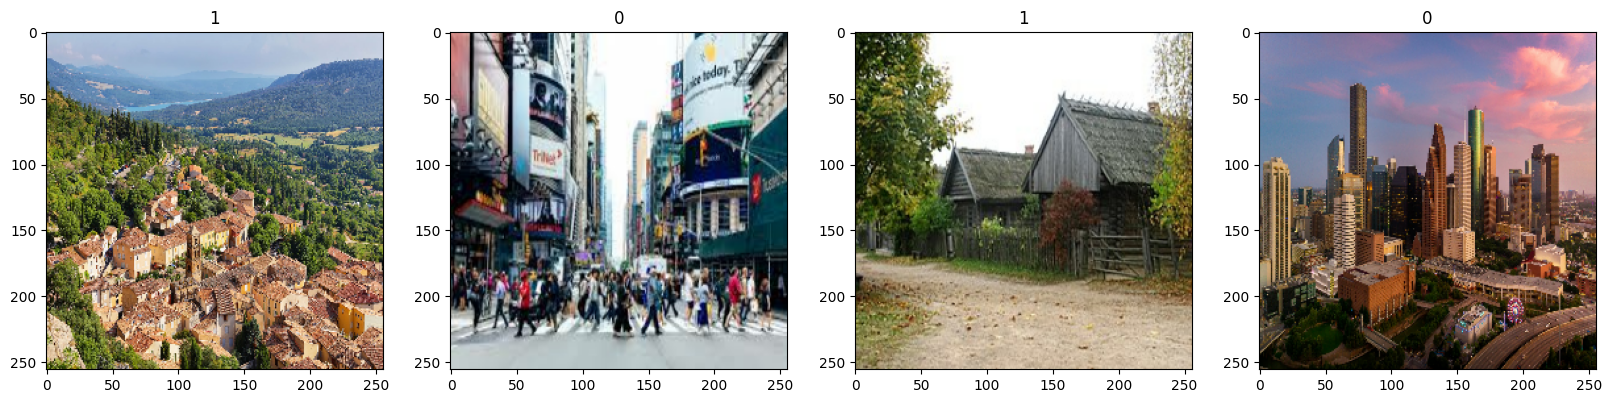

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

- Label 0 - City class
- Label 1 - Village class

## Preprocess data

### Scaling images with [map](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) function

In [14]:
data = data.map(lambda x, y: (x / 255, y))

### Split data to sets

In [15]:
# amount of all batches
len(data)

8

In [16]:
# define amount of batches for each set
train_size = int(len(data) * 0.7)
validation_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1

In [17]:
print(train_size) 
print(validation_size)
print(test_size)

5
2
1


In [18]:
# get particular sets from dataset
train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size + validation_size).take(test_size)

## Build model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train model

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 6s 894ms/step - loss: 1.9358 - accuracy: 0.5875 - val_loss: 0.5434 - val_accuracy: 0.6875
Epoch 2/20
5/5 [==============================] - 6s 879ms/step - loss: 0.6177 - accuracy: 0.6313 - val_loss: 0.6199 - val_accuracy: 0.7500
Epoch 3/20
5/5 [==============================] - 6s 872ms/step - loss: 0.5558 - accuracy: 0.7688 - val_loss: 0.4668 - val_accuracy: 0.8281
Epoch 4/20
5/5 [==============================] - 6s 869ms/step - loss: 0.5172 - accuracy: 0.7500 - val_loss: 0.4602 - val_accuracy: 0.8125
Epoch 5/20
5/5 [==============================] - 6s 872ms/step - loss: 0.4197 - accuracy: 0.7812 - val_loss: 0.3801 - val_accuracy: 0.8438
Epoch 6/20
5/5 [==============================] - 6s 920ms/step - loss: 0.3427 - accuracy: 0.8687 - val_loss: 0.3413 - val_accuracy: 0.8438
Epoch 7/20
5/5 [==============================] - 6s 873ms/step - loss: 0.3340 - accuracy: 0.8500 - val_loss: 0.2550 - val_accuracy: 0.9062
Epoch 8/20
5/5 [====

## Plot performance

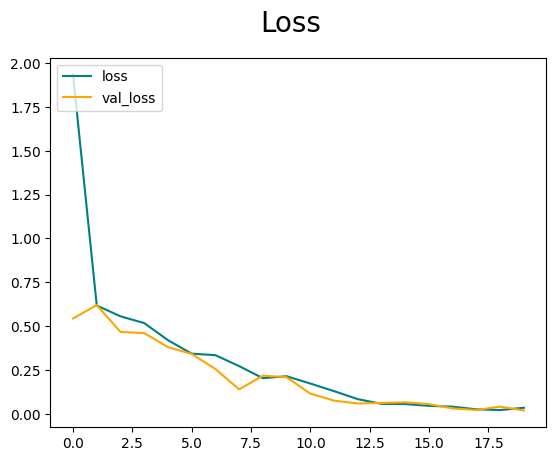

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

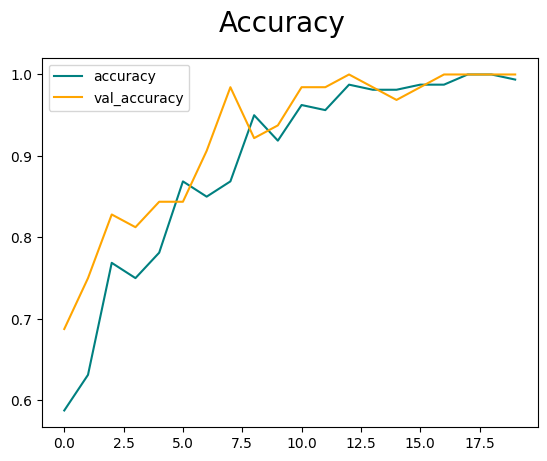

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate performance

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 126ms/step


In [37]:
print(f"Precision = {precision.result().numpy() * 100}%")
print(f"Recall = {recall.result().numpy() * 100}%")
print(f"Accuracy = {accuracy.result().numpy() * 100}%")

Precision = 100.0%
Recall = 100.0%
Accuracy = 100.0%


## Test model

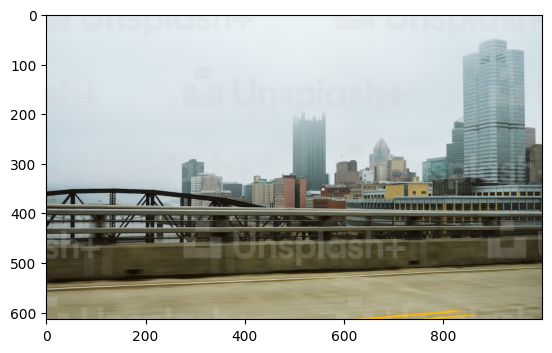

In [50]:
img = cv2.imread('data/city_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [54]:
resize = tf.image.resize(img, (256, 256))

In [52]:
yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 21ms/step


In [55]:
if yhat > 0.5: 
    print("Predicted class is Village")
else:
    print("Predicted class is City")

Predicted class is City


## Save the model

In [58]:
from tensorflow.keras.models import load_model

In [56]:
model.save(os.path.join("models","CNN_Handwriting_Recognition_v0.0.1.h5"))

In [60]:
new_model = load_model(os.path.join("models", "CNN_Handwriting_Recognition_v0.0.1.h5"))

OSError: No file or directory found at CNN_Handwriting_Recognition_v0.0.1.h5